In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_9152\4224644454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# AN end-to-end scikit learn workflow

# Introduction to scikit-learn(sklearn)library
This note book demonstrates some of the useful functions of  the scikit learn libray

0. An end to end scikit learn workflow 
1.get data ready
2.Choose the right estimator/modelalogarithm
3.fit the model to the data and make predictions
4.Evaluate the model
5.improve the model througgh  exprerimentation
6.save and reload trained model
7.put it all together

## 0.An end-to-end scikit learn workflow

In [2]:
# Get the data ready
import pandas as pd
heart_desease=pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\heart-disease.csv")

In [3]:
heart_desease.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
# Create x(Feature matrix)
x=heart_desease.drop('target',axis=1)
#create Labels y
y= heart_desease['target']

In [5]:
!pip install scikit-learn

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# we'll keeep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
clf.fit(x_train,y_train);



In [9]:
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
# 4 Evaluate the model on the trainig data and testing data
clf.score(x_train,y_train)

1.0

In [11]:
clf.score(x_test,y_test)

0.7540983606557377

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.73      0.84      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[19, 10],
       [ 5, 27]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)

0.7540983606557377

In [15]:
clf.score(x_train,y_train)
clf.score(x_test,y_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))
confusion_matrix(y_test,y_preds)
accuracy_score(y_test,y_preds)

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.73      0.84      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



0.7540983606557377

In [16]:
# 5. Immproving training model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10): 
    print(f"Trying model with {i} estimators...." )
    clf=RandomForestClassifier(n_estimators=1).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators....
Model accuracy on test set:70.49%

Trying model with 20 estimators....
Model accuracy on test set:80.33%

Trying model with 30 estimators....
Model accuracy on test set:60.66%

Trying model with 40 estimators....
Model accuracy on test set:73.77%

Trying model with 50 estimators....
Model accuracy on test set:63.93%

Trying model with 60 estimators....
Model accuracy on test set:75.41%

Trying model with 70 estimators....
Model accuracy on test set:73.77%

Trying model with 80 estimators....
Model accuracy on test set:72.13%

Trying model with 90 estimators....
Model accuracy on test set:65.57%



In [17]:
# 6 saaving and loading amodel
import pickle
pickle.dump(clf,open("random_forst_model_1.pkl","wb"))


In [18]:
loaded_model=pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.6557377049180327

## Getting the data ready to br used in a macine learning model

Three main things we are going to do:

    1.splitting the data into features and labels('x'&'y')
    
    2.filling(also called imputing) or disregarding missing values
    
    3.converting non-numerical values to numerical values (Feature Encoding)
    

In [19]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x=heart_desease.drop('target',axis=1)

In [21]:
y=heart_desease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
x.shape


(303, 13)

In [25]:
len(heart_desease)

303

In [26]:
x.shape[0]* 0.8

242.4

In [27]:

242+61

303

# 1.1 make sure bit's numerical

In [28]:
car_sales=pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\9.1 scikit-learn-data\car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# split into x and y
x=car_sales.drop("Price",axis=1)
y=car_sales['Price']
# Split into trainig test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,_y_test)

ValueError: could not convert string to float: 'BMW'

In [ ]:
# Turn Cartegories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_Hot= OneHotEncoder()
transformer=ColumnTransformer([("one_Hot",
                                one_Hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
# Let's refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test =train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train);

In [ ]:
model.score(x_test,y_test)

### 1.2 What if tthere were missing values

1.Fill them with value (also known as imputation).

2.Remove the samples with missing data altogether.

In [33]:
# import car_sales missing data
car_sales_missing= pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\9.1 scikit-learn-data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing.isnull

<bound method DataFrame.isnull of        Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]>

In [35]:

# sum of missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# create x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing['Price']

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cartegorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_Hot",
                                one_Hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

NameError: name 'one_Hot' is not defined

#### Option 1.Filling Missing Data 

In [38]:
# Fill the "make" COlumn
car_sales_missing['Make'].fillna("misssing",inplace=True)

#fill the 'colour' Column
car_sales_missing['Colour'].fillna("misssing",inplace=True)

# Filling the 'Odometer (KM) Column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Filling the "Doors" COlumn
car_sales_missing['Doors'].fillna(4,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9152\1541444974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna("misssing",inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9152\1541444974.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [39]:
# Check out the dataframe Agauin
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove roows with missing values
car_sales_missing["Price"].dropna()

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [41]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [42]:
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cartegorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_Hot",
                                one_Hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

NameError: name 'one_Hot' is not defined

#### fill missing values with scikit learn


In [44]:
car_sales_missing= pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\9.1 scikit-learn-data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Drop the row with no labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# split into x and y 
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [48]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill Cartegorical values with missing & Numerical values with mean
Cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')
# difine columns
cat_features=['Make','Colour']
door_feaures=["Doors"]
num_features=['Odometer (KM)']
# Create an imputer
imputer=ColumnTransformer([('Cat_imputer',Cat_imputer,cat_features),
                          ('door_imputer',door_imputer,door_feaures),
                          ('num_impute',num_imputer,num_features)])
# Transform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled=pd.DataFrame(filled_x,
                             columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:

# Let's try and convert our data into numbers
# convert cartegoricql columns to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cartegorical_features = ["Make","Colour",'Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cartegorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we've got our data as numbers and filled
# let's fir a amodel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(transformed_x,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)
model.score(x_train,y_train)

0.8725024227550571

In [53]:
len(car_sales_filled),len(car_sales)

(950, 1000)

## 2.CHOOSING THE RIGHT ESTIMATOR/ALOGARITHM FOR OUR PROBLEM


scikit learn uses estmator as another term for machine learning model

* classification- is predicting whether a sample is onething or another

* regression-predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [54]:

# import Boston housing project

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [55]:
import pandas as pd
import numpy as np

   
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [56]:
# Create a DataFrame from the fetched data and target
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])

# Display the first few rows of the DataFrame
housing_df.head()
                    

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
# Hw many samples
len(housing_df)

20640

In [58]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [59]:
# let's try ridge regression
from sklearn.linear_model import Ridge
# set up a random seed
np.random.seed(42)
# Create data
x=housing_df.drop(['target'],axis=1)
y=housing_df['target']
# split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate the ridge
model=Ridge()
model.fit(x_train,y_train)
# check the score of the Ridge modelon test data
model.score(x_test,y_test)


0.5758549611440127

#### how do improve the model
 what if the ridge regression wasn't wotk
  
 refer to sklearn map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [66]:
# Let's try random forest regressor
from sklearn.ensemble import RandomForestRegressor

# create a random seed
np.random.seed(42)
# create data
x=housing_df.drop(['target'],axis=1)
y=housing_df['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate the model
rf=RandomForestRegressor()

#Fit the trainig data

rf.fit(x_train,y_train);
# evaluate the model
rf.score(x_test,y_test)

0.8065734772187598

### Choosing an estimator for a classificatiom problem

refer to sklearn map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [67]:
heart_desease=pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\heart-disease.csv")
heart_desease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [68]:
len(heart_desease)

303

##### CONSULTING THE MAP AND IT'S SAYING TRY LINEARSVC

In [69]:
from sklearn.svm import LinearSVC

# create a randomseed 
np.random.seed(42)

# make the data
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']
# split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate linearSVC
clf=LinearSVC()
clf.fit(x_train,y_train);
# evalute the model
clf.score(x_test,y_test)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

Tidbit
1.if you have structured data,use ensemble method.
2.if you have unstructured data ,use deep leaarning or transfer  learning metho.

In [70]:
# try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# create a randomseed 
np.random.seed(42)

# make the data
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']
# split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate linearSVC
clf=RandomForestClassifier()
clf.fit(x_train,y_train);
# evalute the model
clf.score(x_test,y_test)

0.8524590163934426


### Make predictions using a machine learning model
2 ways to make a prediction
1. predict()
2. predict_proba()

In [71]:
# Use a trained model to make predictions
clf.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [72]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
# Compare to truth labels to evaluate the model
y_preds =clf.predict(x_test)
np.mean(y_preds== y_test)

0.8524590163934426

In [75]:
clf.score(x_test,y_test)

0.8524590163934426

In [76]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions using 'predict_proba()''

In [78]:
# predict_proba() returns probabilities of a classiffication model
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [79]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [80]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

Make prdictions for a regression model
 * 'predict()' can also be used for a regression model

In [81]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data 
x=housing_df.drop('target',axis=1)
y=housing_df['target']
# spilt the data
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate and fit the model
model= RandomForestRegressor().fit(x_train,y_train)
# Make predictions
y_preds=model.predict(x_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [83]:
model.score(x_test,y_test)

0.8065734772187598

In [84]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [85]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [86]:
# Compare Predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## Evaluating a machine learning model

Three ways to evaluate a scikit learn estimators/models
1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem_specific metrics
### Evalute a model using the 'score' method

In [87]:

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# create data 
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# Instantiate nad fit the model
clf=RandomForestClassifier().fit(x_train,y_train)
y_preds=clf.predict(x_test)
y_preds




array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(1.0, 0.8524590163934426)

In [89]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data 
x=housing_df.drop('target',axis=1)
y=housing_df['target']
# spilt the data
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate and fit the model
model= RandomForestRegressor().fit(x_train,y_train)
# Make predictions
y_preds=model.predict(x_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [90]:
model.score(x_train,y_train)

0.9736801960414609

In [91]:
model.score(x_test,y_test)

0.8065734772187598

### 4.2 Evaluating a model using 'scoring parameter '

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# create a randomseed 
np.random.seed(42)

# make the data
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']
# split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate linearSVC
clf=RandomForestClassifier()
clf.fit(x_train,y_train);
# evalute the model
clf.score(x_test,y_test)

0.8524590163934426

In [93]:

cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [94]:
cross_val_score(clf,x,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [95]:
np.random.seed(42)
# sinle training andtest split score
clf_single_score=clf.score(x_test,y_test)
# Take the mean of 5 fold score
cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))
# compare clf_single_score and
clf_single_score,cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Evaluating A CLASSIFICATION MODEL

1.Accuracy

2.Area under ROC curve 

3.Confusion matrix

4.classification report

Accuracy

In [96]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# create features
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_preds=clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
clf.score(x_test,y_test)

0.8524590163934426

In [98]:
cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

In [99]:
cross_val_score

0.811639344262295

In [100]:
print(f"Heart desease classifier cross validation accuracy:{(cross_val_score)*100:.2f}%")

Heart desease classifier cross validation accuracy:81.16%


**Area under receiver operating charachtteristic curve(AUC,ROC)**

* Area under curve
* ROC Curve

ROC curve is a comparison of amodels true positive rate and false negative rate

* True positive=model predicts 1 whan the truth is 1
* False positive =model predicts 1 when truth is  zero
* True negative =model predicts 0 when truth is 0
* False negative model predicts 0 whan truth is 1

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
# Make predictions with probabilties
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.92, 0.08],
        [0.15, 0.85],
        [0.17, 0.83],
        [0.15, 0.85],
        [0.14, 0.86],
        [0.05, 0.95],
        [0.29, 0.71],
        [0.82, 0.18],
        [0.44, 0.56],
        [0.04, 0.96]]),
 61)

In [102]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96, 0.89,
       0.18, 0.99, 0.12, 0.47, 0.98, 0.4 , 0.16, 0.3 , 0.77, 0.93, 0.65,
       0.09, 0.02, 0.98, 0.6 , 0.58, 0.09, 0.77, 0.96, 0.99, 0.01, 0.64,
       0.71, 0.85, 0.46, 0.55, 0.37, 0.99, 0.78, 0.08, 0.26, 0.16, 0.68,
       0.58, 0.9 , 0.34, 0.44, 0.46, 0.53, 0.35, 0.4 , 0.92, 0.86, 0.91,
       0.9 , 0.18, 0.66, 0.19, 0.02, 0.99])

In [103]:
# Calculate fpr,tpr and threshholds
fpr,tpr,threshholds=roc_curve(y_test,y_probs_positive)
# Check false positive rate
fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
       0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
       0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
       1.        ])

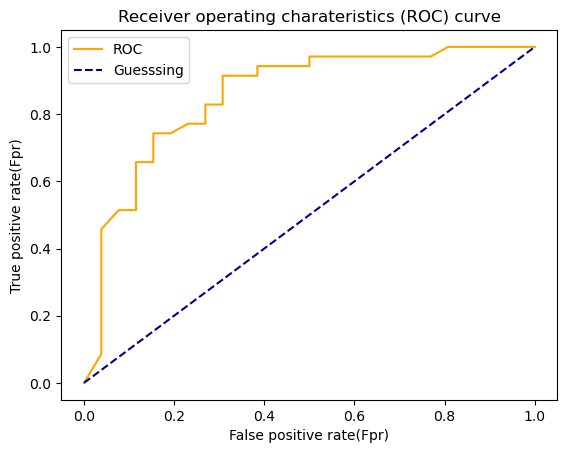

In [104]:
# Create a fuction for plotting A roc curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    plot aroc curve given the False positive rate(fpr)
    and  true positive rate (tpr)
    """
    # plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guesssing")
    # customize the plot
    plt.xlabel("False positive rate(Fpr)")
    plt.ylabel("True positive rate(Fpr)")
    plt.title("Receiver operating charateristics (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)    

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8554945054945055

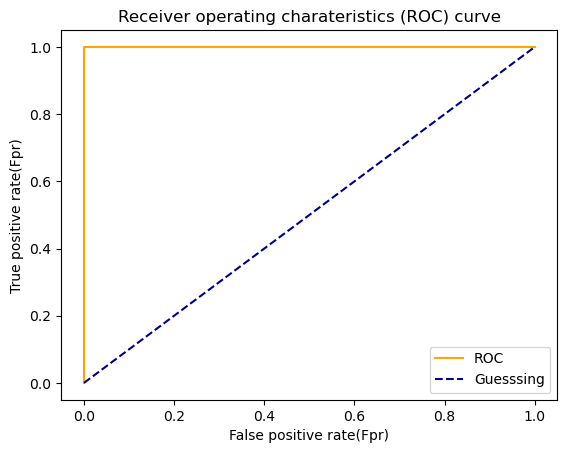

In [106]:
# plot perfect ROc curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [107]:
roc_auc_score(y_test,y_test)

1.0

**Confusion matrix**

A confusion marix is quick way to comprethe labels the model predicts and the actual labels was supposed to predict

in essence giving you an idea of where the modelis getting confused

In [108]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[19,  7],
       [ 6, 29]], dtype=int64)

In [109]:
# visualize confusion matrix with pd.crosstab
pd.crosstab(y_test,
           y_preds,
           colnames=["actual labels"],
           rownames=["predicted labels"])

actual labels,0,1
predicted labels,,
0,19,7
1,6,29


<AxesSubplot: >

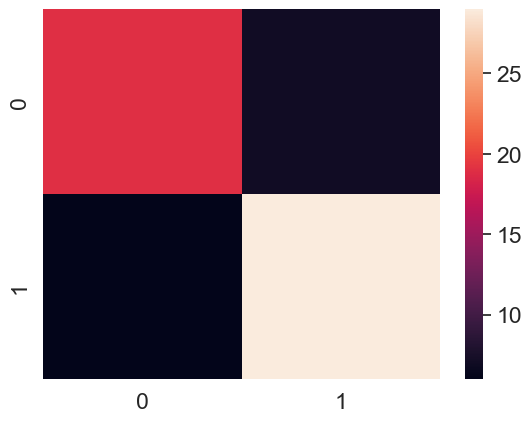

In [110]:
# make a confusion matrix more visual
import seaborn as sns
# set font scale
sns.set(font_scale=1.5)

#create a cnfusion matrix
conf_mat=confusion_matrix(y_test,y_preds)
# plot using seaborn
sns.heatmap(conf_mat)


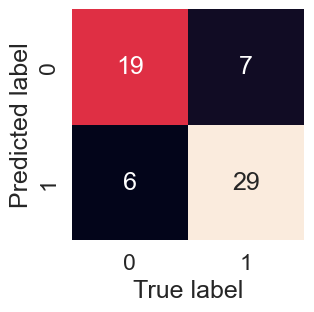

In [111]:
def plot_conf_mat(conf_mat):
 """
    plot confusion matrix using searborns heatmap()
 """  
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(conf_mat,
              annot=True,
              cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")   
plot_conf_mat(conf_mat) 

Classification report

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [113]:
# Where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case
disease_preds=np.zeros(10000)# model predicts case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Regression model ealuation metrics
1 R^2 OR coefficients of determination

2 Mean absolute error (MAE)

3 Mean squared error

**R^2* *

 What R-squared does is ompare your model predictions to the mean of the targets.Values can range from from negative infinty(a very poor model) to 1.if all your model does is predict the mean of your targets,it's R^2 value would be 0.if your model predicts perfectly a range of number it's R^2 value would be 1

In [114]:
# Let's try random forest regressor
from sklearn.ensemble import RandomForestRegressor

# create a random seed
np.random.seed(42)
# create data
x=housing_df.drop(['target'],axis=1)
y=housing_df['target']

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate the model
rf=RandomForestRegressor()

#Fit the trainig data

rf.fit(x_train,y_train);
# evaluate the model
rf.score(x_test,y_test)

0.8065734772187598

In [115]:
from sklearn.metrics import r2_score
# Fill an array with y_test.mean()
y_test_mean=np.full(len(y_test),y_test.mean())


In [116]:
y_test.mean()

2.0550030959302323

In [117]:
r2_score(y_test,y_test_mean)

0.0

In [118]:

r2_score(y_test,y_test)

1.0

In [119]:
from sklearn.metrics  import mean_absolute_error
y_preds=rf.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [120]:
df=pd.DataFrame(data={"actual values":y_test,"Predicted values":y_preds})
df
df['Differences']=df['Predicted values']-df['actual values']
df

,actual values,Predicted values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


**Mean squared error**

In [121]:
from sklearn.metrics import mean_squared_error

y_preds=rf.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [122]:
# calculate mse by hands
squared=np.square(df['Differences'])
squared.mean()


0.2534678520824551

### FINALLY THE SCORING PARAMETER

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
## from sklearn.model_selection import train_test split
np.random.seed(42)
x=heart_desease.drop("target",axis=1)
y=heart_desease['target']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()


In [124]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
# cross_validated_accuracy
print(f'THe cross-validated-accuracy is {np.mean(cv_acc)*100:.2f}%')

THe cross-validated-accuracy is 82.48%


In [126]:
# precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [127]:
# recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [128]:
# f1
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.841476533416832

How about regression model

In [129]:
#from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestRegressor
#np.random.seed(42)
#x=housing_df.drop('target',axis= 1)
#y=housing_df['target']

#model=RandomForestRegressor()

 cv_r2=cross_val_score(model,x,y,cv=5)

In [130]:
#cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
#np.mean(cv_r2)

In [131]:
#cv_r2=cross_val_score(model,x,y,cv=5,scoring='r2')
#cv_r2

In [132]:
#cv_mae=cross_val_score(model,x,y,scoring="neg_mean_absolute_error")
#cv_mae

In [133]:
#cv_mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error")
#cv_mse

In [134]:
#np.mean(cv_mse)

### 4.3 Using different evaluation metrics as scikit_learn functions
**classification evaluation functions**

In [135]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart_desease.drop('target',axis=1)
y=heart_desease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)
# make sme predictions
y_preds=clf.predict(x_test)
# Evaluate the classifier
print("Classifier metrics on the test")
print(f'Accuracy score:{accuracy_score(y_test,y_preds)*100:.3f}')
print(f'Precision:{precision_score(y_test,y_preds)}') 
print(f'Recall:{recall_score(y_test,y_preds)}')
print(f'F1:{f1_score(y_test,y_preds)}')
      
    

Classifier metrics on the test
Accuracy score:85.246
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384616


**Regrssion evaluation functions**

In [136]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=housing_df.drop('target',axis=1)
y=housing_df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
#making prediction
y_preds=model.predict(x_test)
# evaluate the regression model
print('Regressiom model metrics on the test_set')
print(f'r^2:{r2_score(y_test,y_preds)}')
print(f' mean_absolute_error:{mean_absolute_error(y_test,y_preds)}')
print(f'mean_squared_error:{mean_squared_error(y_test,y_preds)}')      



Regressiom model metrics on the test_set
r^2:0.8065734772187598
 mean_absolute_error:0.32659871732073664
mean_squared_error:0.2534678520824551


## Improving a model
From  data perspective :
* COULD WE CORRECT MORE DATA(Generally the more the data the better)
* COULD WE IMPROVE OUR MODEL SO that rather than having more samples we get more indepth information within each sample

From model perspective :
* is there a better model we could use?
* can we improve the current model?

Hyperparameters vs.parameters
* parameter=models finds these patterns in the data
* Hyperparamters= Settings in the model that you can  adjust to (potentially) improve its abilty to find patterns

Three ways to adjust Hyperparameters

1 by hand

2 Randomly with researchcv

3 Exhuastively with GridsearchCV

In [137]:
# how to find  a models hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [138]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand
Let's make three sets training,Validation and test

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

WE're going to try and adjust :

* ' max_depth'
* ' max_features'
* ' min_sample_leaf '
* ' min_sample_split '
* ' n_estimators '

In [140]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_preds label
    on a classification model.
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision": round(precision,2),
                "recall": round(recall,2),
                "f1": round(f1,2)}
    print(f"ACC:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"recall:{recall:.2f}")
    #print(f" f1 score:{f1_score:.2f}")
    
    return metric_dict
          
    

In [141]:
heart_desease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [142]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# shuffle data
heart_desease_shuffled=heart_desease.sample(frac=1)

# split into X & y
x=heart_desease_shuffled.drop('target',axis=1)
y=heart_desease_shuffled['target']

# split the data into train,test,split

train_split=round(0.7*len(heart_desease_shuffled))# 70% of data
valid_split=round(train_split + 0.15*len(heart_desease_shuffled)) # 15 % of data
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[:valid_split]
#len(x_train),len(x_valid),len(x_test)

# instantiate the model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
# Maak predictions on the baseline
y_preds=clf.predict(x_valid)
# Evaluate the classifier on validation metrics
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

ACC:82.22%
Precision:0.81
recall:0.88


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [143]:
np.random.seed(42)
# create a second hyper_parameter with different clssifiers
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)
# Make predictions
y_preds_2=clf_2.predict(x_valid)
# Evalute second classifier

baseline_2_metrics=evaluate_preds(y_valid,y_preds_2)
baseline_2_metrics


ACC:82.22%
Precision:0.84
recall:0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV

In [144]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[12,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}
np.random.seed(42)
# split into x and y
x=heart_desease_shuffled.drop("target",axis=1)
y=heart_desease_shuffled["target"]
# split into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate randomForestClasssifier
clf=RandomForestClassifier(n_jobs=1)
# Set up  a randomizedsearchcv
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)
# fit the RandomSerchCV to clf
rs_clf.fit(x_train,y_train);
      
      

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

In [145]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [147]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)
# Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

ACC:81.97%
Precision:0.77
recall:0.86


### 5.3 Tuning Hyperparameters with GridsearchCV

In [148]:
grid

{'n_estimators': [12, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [149]:
6*5*2*3*3*5
# training 2700 models is too much,unsuitable for laptops and takes alot of time so what we can do is to reduce the search space by creating grid_2


2700

In [150]:
grid_2={'n_estimators': [ 100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [ 6],
         'min_samples_leaf': [1, 2]}

In [151]:
3*1*1*2*2*5

60

In [152]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
# split into x and y
x=heart_desease_shuffled.drop("target",axis=1)
y=heart_desease_shuffled["target"]
# split into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# instantiate randomForestClasssifier
clf=RandomForestClassifier(n_jobs=1)
# Set up  a randomizedsearchcv
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)
# fit the RandomSerchCV to clf
gs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

In [155]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [156]:
gs_y_preds=gs_clf.predict(x_test)
#  evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

ACC:81.97%
Precision:0.77
recall:0.86


let's compare our different model metrics

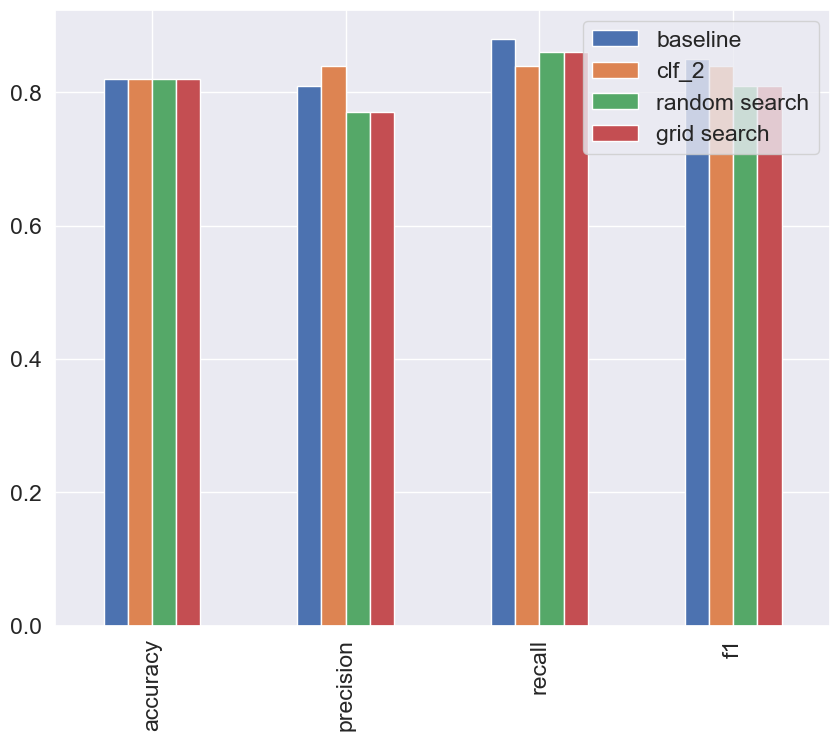

In [157]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":baseline_2_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6.Saving And loadind trained machine learning models

Two ways to save and load machine  learning models:
1. with python's 'pickle' module
2. with the 'joblib' module

**Pickle**

In [158]:
import pickle
#Save an existing model to file
pickle.dump(gs_clf,open("gs_clf_rando_forest_model_1.pk1","wb"))

In [159]:
# Load a saved model
Loaded_pickle_model=pickle.load(open("gs_clf_rando_forest_model_1.pk1","rb"))

In [160]:
# make some predictions
pickle_y_preds=Loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

ACC:81.97%
Precision:0.77
recall:0.86


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**joblib**

In [161]:
from joblib import dump,load

# save a model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [162]:
# IMPORT A SAVED JOBLIB MODEL
LOADED_JOB_MODEL=load(filename="gs_random_forest_model_1.joblib")

In [163]:
# Make and Evaluate joblib predictions
joblib_y_preds=LOADED_JOB_MODEL.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

ACC:81.97%
Precision:0.77
recall:0.86


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

Putting it all together!

In [164]:
data=pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [165]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [166]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do( all in one cell):
1. Fill missing data    
2. convert data to numbers
3. Build a model on tha data


In [167]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
# SET UP numpy seed
import numpy as np
np.random.seed(42)
# Import data and drop the rows with missing labels
data=pd.read_csv(r"C:\Users\user\Documents\[TutsNode.com] - Complete Machine Learning & Data Science Bootcamp 2021\9. Scikit-learn Creating Machine Learning Models\car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'],inplace=True)
# Difine different features for a transforme pipeline
cartegorical_features=["Make","Colour"]
cartegorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]  
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])    
 
numeric_feature=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])   
# set up preprocessing steps(fill missing values,then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", cartegorical_transformer, cartegorical_features),
    ("door", door_transformer, door_feature),
    ("numeric", numeric_transformer, numeric_feature)
])

# creating a preprocessing and a modelling pipeline
model=Pipeline(steps=[("preprocessor" ,preprocessor),
                      ("model",RandomForestRegressor())])
# split the data
x=data.drop("Price",axis=1)
y=data["Price"] 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
model.fit(x_train,y_train)
model.score(x_test,y_test)               

0.22188417408787875

It's also possible to use "Gridsearchcv" and "RandomizedsearchCV" with our model

In [168]:
# use Gridsearchcv with our Regression pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid={
    "preprocessor__numeric__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    #"model__max_features":["None"],
    "model__min_samples_split":[2,4]
}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None,

[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.9s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.9s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.9s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   2.0s
[CV] END model__max_depth=5, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numeric__imputer__strategy=median; total time=   1.7s
[CV] END model__max_depth=5, model__min_samples_split=4, model__n_estimators=100, preprocessor__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numeric__imputer__strategy': ['mean',
                                                                      'median']},
             verbose=2)

In [1]:
gs_model.score(x_test,y_test)

NameError: name 'gs_model' is not defined